In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 72.9 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=3b2829745291058f71d05071dcf8105ecc664e3e5c2d8b762294114247f1369e
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 93.6 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=76d0f99941ff3a5f65883541126b4dbbbbb1e1177ff27adf313225b0308d41ed
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=8ff9521d3ef6c04d6eafba963c654ab02db5e6f2388bb5

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.3
    Uninstalling transformers-4.27.3:
      Successfully uninstalled transformers-4.27.3


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp39-cp39-linux_x86_64.whl size=81478 sha256=98da95138d7d3a259a721d0a7842f69a750fdde4bdad4868737141bd0d0c856e
  Stored in directory: /root/.cache/pip/wheels/a6/28/ba/284e37010e5d3aeed5e45345b58ab8683f97bdce46c9e147f9
Successfully built jellyfish


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

In [5]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = "/content/Lenin_a_Political_Life.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [6]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT

def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

In [7]:
import yake
def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

In [8]:
from rakun2 import RakunKeyphraseDetector
def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords

In [18]:
dir_path = "/content/Lenin_a_Political_Life/part"
rootdir ="/content/Lenin_a_Political_Life/"
part = 1
print
mp_lenin_bert, mp_lenin_yake, mp_lenin_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_lenin_bert[key] = get_keyword_bert(content)
                mp_lenin_yake[key] = get_keyword_yake(content)
                mp_lenin_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

10
1/chapter1


2023-03-25 06:10:59,645 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
10
2/chapter1
2/chapter2
2/chapter3
2/chapter4
2/chapter5
2/chapter6
2/chapter7
2/chapter8
2/chapter9
2/chapter10
10
3/chapter1
3/chapter2
3/chapter3
3/chapter4
3/chapter5
3/chapter6
3/chapter7
3/chapter8
3/chapter9
3/chapter10


In [20]:
with open("mp_lenin_bert.json", "w") as outfile:
    json.dump(mp_lenin_bert, outfile)

with open("mp_lenin_yake.json", "w") as outfile:
    json.dump(mp_lenin_yake, outfile)

with open("mp_lenin_rakun.json", "w") as outfile:
    json.dump(mp_lenin_rakun, outfile)

In [21]:
mp_combined = {}
for k in mp_lenin_rakun.keys():
  k1 = set([v[0] for v in mp_lenin_bert[k]])
  k2 = set([v[0] for v in mp_lenin_yake[k]])
  k3 = set([v[0] for v in mp_lenin_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

In [22]:
mp_combined

{'1/chapter1': {'Central Committee',
  'Lenin',
  'democratic activists',
  'middle class',
  'opposition confront difficulties',
  'oppositions',
  'party',
  'party apparatus',
  'party relations',
  'party structure',
  'political tasks',
  'reprimand to deliver',
  'social democratic',
  'social democrats',
  'starting to defer'},
 '1/chapter2': {'Central Committee',
  'Lenin',
  'Party Congress',
  'Sturm und Drang',
  'bolshevik distaste',
  'bolshevik government',
  'bolshevik policy',
  'bolsheviks',
  'party',
  'petersburg soviet',
  'political parties',
  'provisional revolutionary',
  'revolutionary government',
  'social democrats',
  'socialist revolutions'},
 '1/chapter3': {'Bolshevik Central Committee',
  'Central Committee',
  'Lenin',
  'bolshevik leadership',
  'bolshevik policy',
  'bolshevik strategy',
  'exile in Shushenskoe',
  'land nationalisation',
  'ownership to pass',
  'participate',
  'revolutionary government',
  'social democratic',
  'social democrats'

In [23]:
# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [24]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'bolshevik tirades', 'poorest peasants', 'political party', 'petersburg marxists', 'bolshevik party organisations', 'bolshevik duma deputies', 'missing is incontrovertible', 'bolshevik party policy', 'international political', 'agree to differ', 'petrograd soviet', 'bolshevik duplicity', 'bolshevik central committee', 'vladimir ilich', 'menage a trois', 'bolshevik', 'national question', 'conscription of millions', 'loyalty of millions', 'London and Paris', 'hiding in Finland', 'russian marxism', 'execution of thousands', 'dogged as usual', 'German Communist Party', 'thick as thieves', 'spies and corrupters', 'learn to walk', 'national independence', 'Central Committee', 'international relations', 'skating or gamebird', 'bourgeois revolution', 'middle peasants', 'Russian', 'wanting to proceed', 'party structure', 'armies', 'draft manifesto', 'soviet war', 'travel to Siberia', 'village poor', 'scholarly excellence', 'oppositions', 'bolshevik leaders', 'agree to Aleksei', 'bolshevik lead

In [25]:
def get_year_to_content():
    dir_path = "/content/Lenin_a_Political_Life/part"
    rootdir ="/content/Lenin_a_Political_Life/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) < 1960 and int(date) > 1800:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Starting_To_Defer_1904': ['1/chapter1'], 'Party_Relations_1904': ['1/chapter1'], 'Party_Structure_1904': ['1/chapter1'], 'Party_Apparatus_1904': ['1/chapter1'], 'Party_Apparatus_1918': ['3/chapter10'], 'Lenin_1909': ['1/chapter5'], 'Lenin_1899': ['1/chapter9'], 'Lenin_1910': ['2/chapter4'], 'Lenin_1917': ['2/chapter5'], 'Lenin_1921': ['3/chapter4'], 'Lenin_1918': ['3/chapter5'], 'Lenin_1923': ['3/chapter8'], 'Oppositions_1904': ['1/chapter1'], 'Social_Democratic_1904': ['1/chapter1'], 'Social_Democratic_1905': ['1/chapter3'], 'Social_Democratic_1907': ['1/chapter4'], 'Social_Democratic_1909': ['1/chapter5'], 'Social_Democratic_1899': ['1/chapter9'], 'Social_Democratic_1902': ['1/chapter10'], 'Social_Democratic_1915': ['2/chapter1'], 'Social_Democratic_1910': ['2/chapter4'], 'Social_Democratic_1914': ['2/chapter10'], 'Reprimand_To_Deliver_1904': ['1/chapter1'], 'Democratic_Activists_1904': ['1/chapter1'], 'Central_Committee_1910': ['2/chapter4'], 'Social_De

In [26]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [27]:
key_yr_chap_mp

defaultdict(list,
            {'Starting_To_Defer_1904': ['1/chapter1'],
             'Party_Relations_1904': ['1/chapter1'],
             'Party_Structure_1904': ['1/chapter1'],
             'Party_Apparatus_1904': ['1/chapter1'],
             'Party_Apparatus_1918': ['3/chapter10'],
             'Lenin_1909': ['1/chapter5'],
             'Lenin_1899': ['1/chapter9'],
             'Lenin_1910': ['2/chapter4'],
             'Lenin_1917': ['2/chapter5'],
             'Lenin_1921': ['3/chapter4'],
             'Lenin_1918': ['3/chapter5'],
             'Lenin_1923': ['3/chapter8'],
             'Oppositions_1904': ['1/chapter1'],
             'Social_Democratic_1904': ['1/chapter1'],
             'Social_Democratic_1905': ['1/chapter3'],
             'Social_Democratic_1907': ['1/chapter4'],
             'Social_Democratic_1909': ['1/chapter5'],
             'Social_Democratic_1899': ['1/chapter9'],
             'Social_Democratic_1902': ['1/chapter10'],
             'Social_Democratic_1

In [39]:
def split_sentence_from_text(key):
    file_loc = r"/content/Lenin_a_Political_Life/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Starting_To_Defer_1904
Party_Relations_1904
Party_Structure_1904
Party_Apparatus_1904
Party_Apparatus_1918
Lenin_1909
Lenin_1899
Lenin_1910
Lenin_1917
Lenin_1921
Lenin_1918
Lenin_1923
Oppositions_1904
Social_Democratic_1904
Social_Democratic_1905
Social_Democratic_1907
Social_Democratic_1909
Social_Democratic_1899
Social_Democratic_1902
Social_Democratic_1915
Social_Democratic_1910
Social_Democratic_1914
Reprimand_To_Deliver_1904
Democratic_Activists_1904
Central_Committee_1910
Social_Democrats_1904
Social_Democrats_1905
Social_Democrats_1907
Social_Democrats_1909
Social_Democrats_1899
Social_Democrats_1902
Social_Democrats_1915
Social_Democrats_1910
Social_Democrats_1917
Social_Democrats_1913
Social_Democrats_1914
Middle_Class_1904
Middle_Class_1870
Middle_Class_1890
Middle_Class_1902
Political_Tasks_1904
Opposition_Confront_Difficulties_1904
Party_1904
Party_1905
Party_1907
Party_1902
Provisional_Revolutionary_1905
Provisional_Revolutionary_1917
Socialist_Revolutions_1905
Socialist_R

In [40]:
with open("mp_key_doc_lenin.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [41]:
url = 'https://en.wikipedia.org/wiki/Vladimir_Lenin'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life', 'Childhood:_1870–1887', 'University_and_political_radicalisation:_1887–1893', 'Revolutionary_activity', 'Early_activism_and_imprisonment:_1893–1900', 'Munich,_London,_and_Geneva:_1900–1905', 'Revolution_of_1905_and_its_aftermath:_1905–1914', 'First_World_War:_1914–1917', 'February_Revolution_and_the_July_Days:_1917', 'October_Revolution:_1917', "Lenin's_government", 'Organising_the_Soviet_government:_1917–1918', 'Social,_legal,_and_economic_reform:_1917–1918', 'Treaty_of_Brest-Litovsk:_1917–1918', 'Anti-Kulak_campaigns,_Cheka,_and_Red_Terror:_1918–1922', 'Civil_War_and_the_Polish–Soviet_War:_1918–1920', 'Comintern_and_world_revolution:_1919–1920', 'Famine_and_the_New_Economic_Policy:_1920–1922', 'Declining_health_and_conflict_with_Stalin:_1920–1923', 'Death_and_funeral:_1923–1924', 'Political_ideology', 'Marxism_and_Leninism', 'Democracy_and_the_national_question', 'Personal_life_and_characteristics', 'Legacy', 'Within_the_Soviet_Union', 'In_the_international_communist_m

In [42]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' or val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            print(f"{key1} {key2} {cos_scores}")

Streaming output truncated to the last 5000 lines.
Death_and_funeral:_1923–1924 Bolshevik_Intransigence_1917 0.4676329791545868
Death_and_funeral:_1923–1924 Anti_Governmental_1917 0.44918397068977356
Death_and_funeral:_1923–1924 Bourgeois_Revolution_1917 0.4561835527420044
Death_and_funeral:_1923–1924 Petrograd_Soviet_1917 0.3922669291496277
Death_and_funeral:_1923–1924 Illegal_Party_1910 0.2304346114397049
Death_and_funeral:_1923–1924 Fascinated_Lenin_1910 0.48045602440834045
Death_and_funeral:_1923–1924 Consequently_Lenin_1910 0.48224204778671265
Death_and_funeral:_1923–1924 Vladimir_Ilich_Lenin_1910 0.4793311059474945
Death_and_funeral:_1923–1924 Party_Organisations_1910 0.3560641407966614
Death_and_funeral:_1923–1924 Bolshevik_Ambition_1910 0.48237520456314087
Death_and_funeral:_1923–1924 Metal_And_Confronted_1917 0.27834659814834595
Death_and_funeral:_1923–1924 Bolshevik_Delegates_1917 0.4994446039199829
Death_and_funeral:_1923–1924 National_Question_1917 0.45594292879104614
Death

In [43]:
mp_sim_score

{'Early_life->Starting_To_Defer_1904': tensor(-0.0269, device='cuda:0'),
 'Early_life->Party_Relations_1904': tensor(0.0298, device='cuda:0'),
 'Early_life->Party_Structure_1904': tensor(-0.0152, device='cuda:0'),
 'Early_life->Party_Apparatus_1904': tensor(0.0415, device='cuda:0'),
 'Early_life->Party_Apparatus_1918': tensor(0.0115, device='cuda:0'),
 'Early_life->Lenin_1909': tensor(0.0260, device='cuda:0'),
 'Early_life->Lenin_1899': tensor(0.0020, device='cuda:0'),
 'Early_life->Lenin_1910': tensor(-0.0696, device='cuda:0'),
 'Early_life->Lenin_1917': tensor(0.0159, device='cuda:0'),
 'Early_life->Lenin_1921': tensor(-0.0058, device='cuda:0'),
 'Early_life->Lenin_1918': tensor(-0.0293, device='cuda:0'),
 'Early_life->Lenin_1923': tensor(-0.0555, device='cuda:0'),
 'Early_life->Oppositions_1904': tensor(0.0150, device='cuda:0'),
 'Early_life->Social_Democratic_1904': tensor(0.0313, device='cuda:0'),
 'Early_life->Social_Democratic_1905': tensor(0.0300, device='cuda:0'),
 'Early_life

In [44]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open("mp_sim_score_lenin.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [45]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

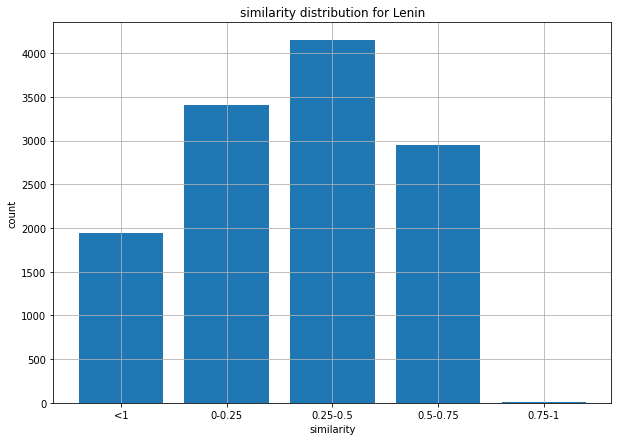

In [46]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<1"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


display_bar_plot(mp_sim_score_bar_range,"similarity distribution for Lenin","similarity","count")

In [47]:
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) < 1960 and int(date) > 1800:                    
                #print date
                year_list.append(date)
    except:
        pass
    if year_list:
        res = max(set(year_list), key=year_list.count)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
    

    
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = 170
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
#         print(f"{date_score}    {sim_score}")
        mixed_sim_score[key] = date_score*sim_score
print(mixed_sim_score)
maxval = max(mixed_sim_score.values())
for k,v in mixed_sim_score.items():
    mixed_sim_score[k] = v/maxval
    
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    #if v>= 0.35:
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))
    
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in section_wise_keyword_filtered.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")

{'Childhood:_1870–1887->Russian_Marxism_1890': 0.02195203588122413, 'Childhood:_1870–1887->Young_Vladimir_1870': 0.5468862056732178, 'Childhood:_1870–1887->Petersburg_Organisation_1895': 0.014169738842890814, 'Childhood:_1870–1887->Socialist_Revolutionaries_1921': 0.006178391667512747, 'Childhood:_1870–1887->Leninism_1923': 0.006461279259787665, 'Childhood:_1870–1887->Lenin_1923': 0.006537306639883253, 'Childhood:_1870–1887->Political_Life_Lenin_1914': 0.006714337401919895, 'Childhood:_1870–1887->Central_Party_1917': 0.006470378488302231, 'Childhood:_1870–1887->Petersburg_1895': 0.014758632733271673, 'Childhood:_1870–1887->Zurich_1913': 0.010063371197743849, 'Childhood:_1870–1887->Fascinated_Lenin_1910': 0.007833542620263449, 'Childhood:_1870–1887->Kazan_Student_1890': 0.021455546220143635, 'Childhood:_1870–1887->Bolshevik_1909': 0.009628813713788986, 'Childhood:_1870–1887->Vladimir_Ulyanov_1870': 0.7082182765007019, 'Childhood:_1870–1887->Stalin_1923': 0.005877852439880371, 'Childhood

In [48]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Party', 'Vladimir', 'Bolshevik_Intransigence', 'Leninism', 'Unrest', 'Bolshevik_Hegemony', 'Requisitioning_Campaign', 'Bolshevik_Regime', 'Bolshevik_Leaders', 'Happened_To_Belong', 'International_Relations', 'Red_Army', 'Petrograd_Insurrection', 'Bolshevik_Rule', 'Vladimir_Ilich', 'Political_Tasks', 'Socialist_Revolutions', 'Social_Democratic', 'Socialist_Revolution', 'Bolshevik_Influence', 'Bolshevik_Practicality', 'Bolshevik_Faction', 'Revolutionary_Government', 'Bolshevik_Opposition', 'Bolshevik_Tirades', 'Bolshevik_Party', 'Comrade_Lenin', 'Bolshevik_Demands', 'Social-Democratic_Labour_Party', 'Bolshevik_Leader', 'Stalin', 'Bolshevik_Party_Leadership', 'Social_Democrats', 'Bolshevik_Opinion', 'Fascinated_Lenin', 'Russian', 'Bolshevik_Central_Committee_Policies', 'Bolshevik', 'Lenin', 'Young_Vladimir', 'Agrarian_Socialists', 'Bolshevik_Government', 'Official_Socialist', 'Instead_Lenin', 'Food_Supplies', 'Vladimir_Ilich_Ulyanov', 'Separate_Peace', 'Divulge_Lenin', 'Bolshevik_Power'

In [49]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)

2452
{'Council_of_People%27s_Commissars_(Russia)', 'Template_talk:Communist_Party_of_the_Soviet_Union', 'Latvian_Socialist_Soviet_Republic', 'Peter_Ermakov', 'Zygmunt_Bauman', '%C3%89tienne_Cabet', 'Friedrich_Schiller', 'Category:Russian_communists', 'Premier_of_the_Soviet_Union', 'Jagiellonian_University', 'Decree_on_Land', 'Ministry_of_Internal_Affairs_of_the_Russian_Empire', 'General_Secretary_of_the_Communist_Party_of_the_Soviet_Union', 'John_Searle', 'Glasnost', 'Green_anarchism', 'Eug%C3%A8ne_Sue', 'Agent_provocateur', 'Ukrainian_People%27s_Republic', 'Category:Russian_people_of_Swedish_descent', 'Template_talk:12th_Politburo_of_the_Russian_Communist_Party_(Bolsheviks)', 'Communist_Party_of_Uzbekistan', 'Bertrand_Russell', 'Walter_Ulbricht', 'August_Bebel', 'Politburo_of_the_26th_Congress_of_the_Communist_Party_of_the_Soviet_Union', 'Russkaya_mysl', 'Raymond_Aron', 'Operation_Faustschlag', 'Philippe_Buonarroti', 'Template_talk:11th_Politburo_of_the_Russian_Communist_Party_(Bolshe

In [50]:
hyperlinks_present = final_keywords & urls
print(hyperlinks_present)
len(hyperlinks_present)

{'Red_Army', 'Leninism', 'Bolsheviks', 'Socialism'}


4

In [51]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'National_Question_1919', 'Young_Vladimir_1870', 'Socialist_Coalition_1917', 'Bolshevik_Government_1905', 'Leninism_1923', 'Bolshevik_Demands_1918', 'Lenin_1923', 'Bolshevik_Intransigence_1917', 'Proletarian_Culture_1917', 'Unrest_1917', 'Fascinated_Lenin_1910', 'Vladimir_Ulyanov_1870', 'Bolshevik_1909', 'Stalin_1923', 'Bolshevik_Leaders_1918', 'Instead_Lenin_1923', 'Party_1904', 'Bolshevik_Rule_1921', 'Russian_1899', 'Vladimir_Ilich_1870', 'Bolshevik_Party_1918', 'Lenin_1910', 'International_Relations_1917', 'Lenin_1921', 'Social-Democratic_Labour_Party_1899', 'Bolshevik_Leader_1918', 'Bolshevik_Hegemony_1917', 'Bolshevik_Central_Committee_Policies_1917', 'Bolshevik_Power_1917', 'Political_Tasks_1904', 'Petrograd_Insurrection_1917', 'Social_Democrats_1904', 'Bolshevik_Party_Organisations_1917', 'Bolshevik_Practicality_1918', 'Separate_Peace_1918', 'Bolshevik_Influence_1909', 'Comrade_Lenin_1923', 'Lenin_1899', 'Food_Supplies_1918', 'Bolsheviks_1905', 'Bolshevik_Regime_1921', 'Red_Arm

In [52]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Party_Apparatus_1904': ['1/chapter1'], 'Party_Apparatus_1918': ['3/chapter10'], 'Lenin_1909': ['1/chapter5'], 'Lenin_1899': ['1/chapter9'], 'Lenin_1910': ['2/chapter4'], 'Lenin_1921': ['3/chapter4'], 'Lenin_1918': ['3/chapter5'], 'Lenin_1923': ['3/chapter8'], 'Social_Democratic_1904': ['1/chapter1'], 'Social_Democratic_1899': ['1/chapter9'], 'Social_Democrats_1904': ['1/chapter1'], 'Social_Democrats_1899': ['1/chapter9'], 'Political_Tasks_1904': ['1/chapter1'], 'Party_1904': ['1/chapter1'], 'Socialist_Revolutions_1905': ['1/chapter2'], 'Socialist_Revolutions_1921': ['3/chapter4'], 'Revolutionary_Government_1917': ['2/chapter2'], 'Bolshevik_Distaste_1905': ['1/chapter2'], 'Bolsheviks_1905': ['1/chapter2'], 'Bolsheviks_1922': ['3/chapter7'], 'Bolshevik_Government_1905': ['1/chapter2'], 'Bolshevik_Policy_1905': ['1/chapter2', '1/chapter3'], 'Bolshevik_Leadership_1918': ['3/chapter5'], 'Bolshevik_Faction_1922': ['3/chapter7'], 'Bolshevik_Leaders_1918': ['3/chapter5', '3/chapter9'], 'Bols

In [53]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['national question', 'young vladimir', 'socialist coalition', 'bolshevik government', 'leninism', 'bolshevik demands', 'lenin', 'bolshevik intransigence', 'proletarian culture', 'unrest', 'fascinated lenin', 'vladimir ulyanov', 'bolshevik', 'stalin', 'bolshevik leaders', 'instead lenin', 'party', 'bolshevik rule', 'russian', 'vladimir ilich', 'bolshevik party', 'lenin', 'international relations', 'lenin', 'social-democratic labour party', 'bolshevik leader', 'bolshevik hegemony', 'bolshevik central committee policies', 'bolshevik power', 'political tasks', 'petrograd insurrection', 'social democrats', 'bolshevik party organisations', 'bolshevik practicality', 'separate peace', 'bolshevik influence', 'comrade lenin', 'lenin', 'food supplies', 'bolsheviks', 'bolshevik regime', 'red army', 'bolshevik opposition', 'socialist revolution', 'socialism', 'bolshevik', 'divulge lenin', 'socialist revolutions', 'requisitioning campaign', 'bolshevik repression', 'bolshevik opinion', 'socialist re

In [54]:
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

19
87
0.21839080459770116
